In [27]:
import re
import pandas as pd
import numpy as np
import requests
import seaborn as sns; sns.set(color_codes=True)
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [28]:
teams = pd.read_html('https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_squads', header=0)

In [29]:
len(teams)

38

In [30]:
teams[31]

,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club
0,1,1GK,Abdoulaye Diallo,(1992-03-30)30 March 1992 (aged 26),17,0,Rennes
1,2,2DF,Saliou Ciss,(1989-06-15)15 June 1989 (aged 28),18,0,Valenciennes
2,3,2DF,Kalidou Koulibaly,(1991-06-20)20 June 1991 (aged 26),26,0,Napoli
3,4,2DF,Kara Mbodji,(1989-11-22)22 November 1989 (aged 28),52,5,Anderlecht
4,5,3MF,Idrissa Gueye,(1989-09-26)26 September 1989 (aged 28),61,1,Everton
5,6,3MF,Salif Sané,(1990-08-25)25 August 1990 (aged 27),22,0,Hannover 96
6,7,4FW,Moussa Sow,(1986-01-19)19 January 1986 (aged 32),51,18,Bursaspor
7,8,3MF,Cheikhou Kouyaté (captain),(1989-12-21)21 December 1989 (aged 28),48,2,West Ham United
8,9,4FW,Mame Biram Diouf,(1987-12-16)16 December 1987 (aged 30),49,10,Stoke City
9,10,4FW,Sadio Mané,(1992-04-10)10 April 1992 (aged 26),53,14,Liverpool


In [31]:
teams = teams[:32]

In [32]:
r = requests.get('https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_squads')
soup = BeautifulSoup(r.text, 'html.parser')

Scrape the flags

In [33]:
for i, table in enumerate(soup.find_all('table')):
    j = 0
    arr = np.empty(23, dtype='object')
    for tag in table.find_all('span', {"class": "flagicon"}):
        if tag.a is None:
            continue
        arr[j] = tag.img['alt']
        j += 1
    teams[i]["Country"] = arr
    if i == 31:
        break

Scrape team names

In [34]:
i = 0
arr = np.empty(32, dtype='object')
for tag in soup.find_all("h3"):
    for t in tag.find_all("span", {"class": "mw-headline"}):
        arr[i] = t.text
        i += 1
    if i == 32:
        break

In [35]:
for team, team_df in zip(arr, teams):
    team_df["Team"] = team
df = pd.concat(teams)    

In [36]:
DOB = "Date of birth (age)"
def age_separator(row):
    match = re.search(r'[0-9-]{10}', row[DOB])
    row["DOB"] = match.group()
    match = re.search(r'(?<=aged )\d+', row[DOB])
    row["age"] = match.group()
    return row


df = df.apply(age_separator, axis=1)
df.drop(DOB, axis=1, inplace=True)
df.age = df.age.astype('int')
df.DOB = pd.to_datetime(df.DOB)

In [37]:
df.to_csv("data/squads.csv", encoding='utf-8')

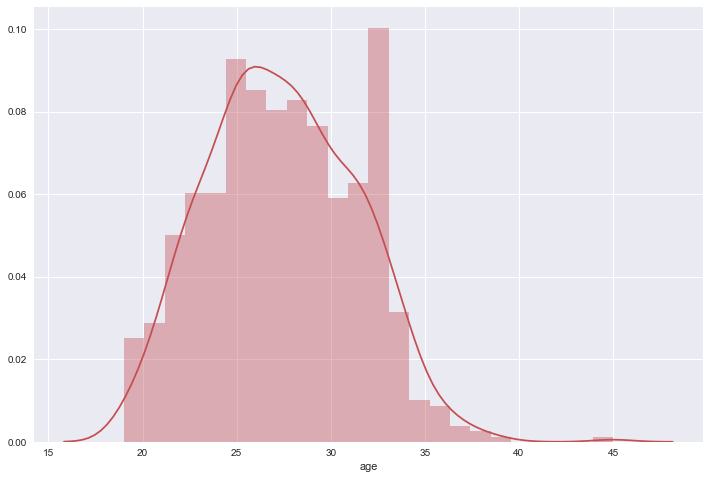

In [38]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df.age, color='r')
plt.savefig('dist.png', dpi=600)